<a href="https://colab.research.google.com/github/Igor-Minin/NN2021/blob/master/lr5/lr5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip -O 101_food_classes_10_percent.zip



In [ ]:
!unzip 101_food_classes_10_percent.zip

In [3]:
!unzip food.zip

Archive:  food.zip
   creating: food/test/
   creating: food/test/beignets/
  inflating: food/test/beignets/1002850.jpg  
  inflating: food/test/beignets/1017820.jpg  
  inflating: food/test/beignets/1022290.jpg  
  inflating: food/test/beignets/1036242.jpg  
  inflating: food/test/beignets/1037244.jpg  
  inflating: food/test/beignets/1041281.jpg  
  inflating: food/test/beignets/1049387.jpg  
  inflating: food/test/beignets/1058530.jpg  
  inflating: food/test/beignets/106001.jpg  
  inflating: food/test/beignets/1062952.jpg  
  inflating: food/test/beignets/108745.jpg  
  inflating: food/test/beignets/1091301.jpg  
  inflating: food/test/beignets/1099692.jpg  
  inflating: food/test/beignets/1114182.jpg  
  inflating: food/test/beignets/1116735.jpg  
  inflating: food/test/beignets/1117684.jpg  
  inflating: food/test/beignets/1120712.jpg  
  inflating: food/test/beignets/1120732.jpg  
  inflating: food/test/beignets/1121153.jpg  
  inflating: food/test/beignets/1125450.jpg  
  infl

In [4]:
classNames = ["beignets", "falafel", "nachos"]
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D , Dropout, BatchNormalization
from tensorflow.keras import Sequential



In [5]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/30
24/24 [==============================] - 13s 524ms/step - loss: 1.2380 - accuracy: 0.3720 - val_loss: 1.1901 - val_accuracy: 0.3467
Epoch 2/30
24/24 [==============================] - 12s 506ms/step - loss: 0.9701 - accuracy: 0.5253 - val_loss: 0.9631 - val_accuracy: 0.5333
Epoch 3/30
24/24 [==============================] - 12s 509ms/step - loss: 0.8966 - accuracy: 0.5880 - val_loss: 0.9262 - val_accuracy: 0.5422
Epoch 4/30
24/24 [==============================] - 12s 509ms/step - loss: 0.8606 - accuracy: 0.6040 - val_loss: 0.9448 - val_accuracy: 0.5556
Epoch 5/30
24/24 [==============================] - 12s 517ms/step - loss: 0.7986 - accuracy: 0.6453 - val_loss: 1.0157 - val_accuracy: 0.6133
Epoch 6/30
24/24 [==============================] - 13s 521ms/step - loss: 0.8089 - accuracy: 0.6453 - val_loss: 0.9769 - val_accuracy: 0.6178
Epoch 7/30
24/24 [=

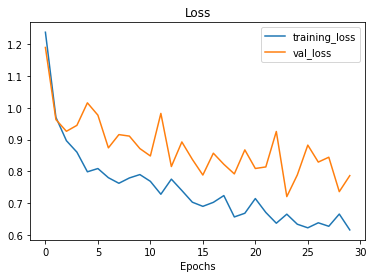

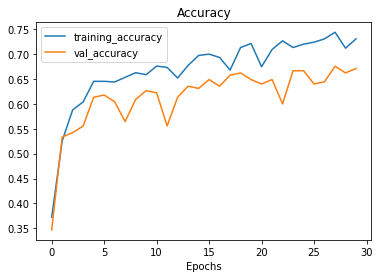

In [9]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "food/test/"
test_dir = "food/train/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Dense(128, activation='relu'),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data_augmented,
                          epochs=30,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))
plot_loss_curves(history)
